In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("ages_dataset.csv")
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Id                                        1223009 non-null  object 
 1   Name                                      1223009 non-null  object 
 2   Short description                         1155109 non-null  object 
 3   Gender                                    1089363 non-null  object 
 4   Country                                   887500 non-null   object 
 5   Occupation                                1016095 non-null  object 
 6   Birth year                                1223009 non-null  int64  
 7   Death year                                1223008 non-null  float64
 8   Manner of death                           53603 non-null    object 
 9   Age of death                              1223008 non-null  float64
 10  Associ

* 1,223,009 data entries
* 13 columns/attributes
* Null value counts can be derived from the information above.
* "Manner of death" contains the least values

In [7]:
#Print number of unique values of each column
print("\nSize of each variation of categories:")
for column in df:
    print(column + ":", df[column].unique().size)


Size of each variation of categories:
Id: 1222997
Name: 1130871
Short description: 512440
Gender: 21
Country: 5962
Occupation: 9314
Birth year: 2173
Death year: 2254
Manner of death: 207
Age of death: 131
Associated Countries: 1900
Associated Country Coordinates (Lat/Lon): 1900
Associated Country Life Expectancy: 1619


## Preprocessing

#### Normalise Formats

In [8]:
df.dtypes

Id                                           object
Name                                         object
Short description                            object
Gender                                       object
Country                                      object
Occupation                                   object
Birth year                                    int64
Death year                                  float64
Manner of death                              object
Age of death                                float64
Associated Countries                         object
Associated Country Coordinates (Lat/Lon)     object
Associated Country Life Expectancy           object
dtype: object

In [9]:
df.head(1)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"


In [20]:
#fill empty values with 0 to convert data type
df["Death year"] = df["Death year"].fillna(0)
df["Age of death"] = df["Age of death"].fillna(0)
#convert numerical values to int32
df["Death year"] = df["Death year"].astype('int32')
df["Birth year"] = df["Birth year"].astype('int32')
df["Age of death"] = df["Age of death"].astype('int32')
df.dtypes

Id                                          object
Name                                        object
Short description                           object
Gender                                      object
Country                                     object
Occupation                                  object
Birth year                                   int32
Death year                                   int32
Manner of death                             object
Age of death                                 int32
Associated Countries                        object
Associated Country Coordinates (Lat/Lon)    object
Associated Country Life Expectancy          object
dtype: object

#### Remove duplicates

In [24]:
print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

Dataframe duplicates:  2
Id duplicates:  12
Name duplicates:  92138
Short description duplicates:  710569
Gender duplicates:  1222988
Country duplicates:  1217047
Occupation duplicates:  1213695
Birth year duplicates:  1220836
Death year duplicates:  1220755
Manner of death duplicates:  1222802
Age of death duplicates:  1222879
Associated Countries duplicates:  1221109
Associated Country Coordinates (Lat/Lon) duplicates:  1221109
Associated Country Life Expectancy duplicates:  1221390


In [27]:
df.drop_duplicates(subset=["Id"], inplace=True)

print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

Dataframe duplicates:  0
Id duplicates:  0
Name duplicates:  92126
Short description duplicates:  710561
Gender duplicates:  1222976
Country duplicates:  1217035
Occupation duplicates:  1213683
Birth year duplicates:  1220824
Death year duplicates:  1220743
Manner of death duplicates:  1222790
Age of death duplicates:  1222867
Associated Countries duplicates:  1221097
Associated Country Coordinates (Lat/Lon) duplicates:  1221097
Associated Country Life Expectancy duplicates:  1221378


#### Remove Redundant Columns

## Visualisation

Text(0, 0.5, 'Number of People')

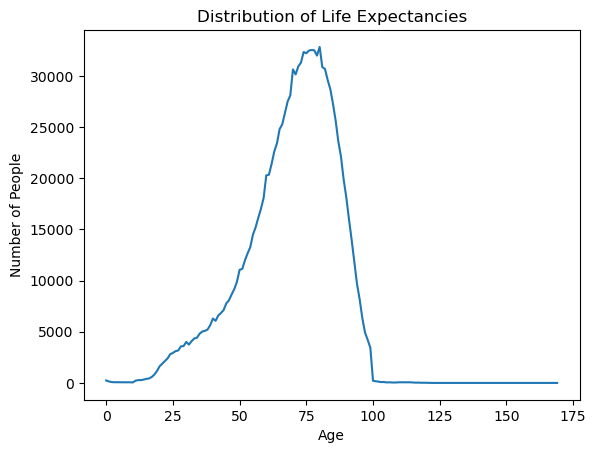

In [38]:
plt.title("Distribution of Life Expectancies")
plt.plot(df["Age of death"].value_counts().sort_index())
plt.xlabel("Age")
plt.ylabel("Number of People")

In [48]:
print(df["Occupation"].unique())
for titles in df["Occupation"]:
    print(titles, "count: ", df["Occupation"][titles].size)

['Politician' 'Artist' 'Egyptologist' ... 'Highwayman; manual worker'
 'Director; scout leader' 'Tailor; model']


KeyError: 'Politician'